/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'model__C': 26, 'model__max_iter': 330, 'model__tol': 6.633582306444221e-07, 'pca__n_components': 16}
train 정확도: 0.9853
test 정확도: 0.5294
total 정확도: 0.8941
others 정확도: 0.8113
[[40  0  0  0]
 [ 0  2  0  0]
 [ 0  0 11  1]
 [ 0  0  0 14]]
[[5 0 2 2]
 [1 0 0 0]
 [1 0 1 1]
 [1 0 0 3]]
[[45  0  2  2]
 [ 1  2  0  0]
 [ 1  0 12  2]
 [ 1  0  0 17]]
[[43  0  8  2]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]


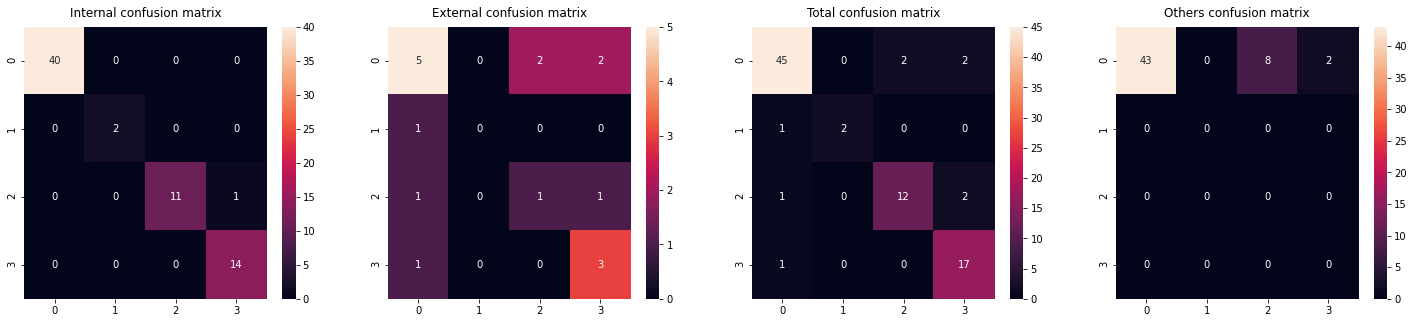

              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59         9
         1.0       0.00      0.00      0.00         1
         2.0       0.33      0.33      0.33         3
         3.0       0.50      0.75      0.60         4

    accuracy                           0.53        17
   macro avg       0.36      0.41      0.38        17
weighted avg       0.51      0.53      0.51        17



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, KFold,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler, MaxAbsScaler,  QuantileTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from tensorflow.python.keras.utils import np_utils
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.combine import SMOTEENN

seed=0
np.random.seed(seed)

#데이터 입력
df = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2_MORDRED(3D)_apppendscore_dropsmiles.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/MORDRED(3D)/VRK2add_MORDRED(3D)_apppendscore_dropsmiles.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Others_MORDRED(3D)_appendscore_dropsmiles.csv')
df3 = pd.concat([df,df1,df2])
data = pd.read_csv('/content/drive/MyDrive/Inhibitor classification/Inhibitor/Others/MORDRED(3D)/Drug_MORDRED(3D)_appendscore_dropsmiles.csv')

#데이터 분류
#dataset = df.values
#X = dataset[:,:-1]
#Y = dataset[:,-1]

#dataset2 = df2.values
#X_ex = dataset2[:,:-1]
#Y_ex = dataset2[:,-1]

dataset3 = df3.values
X = dataset3[:,:-1]
Y = dataset3[:,-1]

data = data.values
X_others =data[:,:-1]
Y_others =data[:,-1]

#print(X.shape)
#print(Y.shape)
#print(X_others.shape)
#print(Y_others.shape)

#복합샘플링

#randomover = RandomOverSampler(random_state=seed)
#X_re, Y_re = randomover.fit_resample(X, Y)

#ada = ADASYN(random_state=seed)
#X_re1, Y_re1 = ada.fit_resample(X_re, Y_re)

#smote = SMOTE(random_state=seed)
#X_re2, Y_re2 = smote.fit_resample(X_re1, Y_re1)

#smoteenn = SMOTEENN(enn=EditedNearestNeighbours(n_neighbors=2), random_state=seed)
#X_re, Y_re = smoteenn.fit_resample(X, Y)

#print(X.shape)
#print(X_re.shape)

#데이터 split

train_input, test_input, train_target, test_target = train_test_split(X, Y, test_size=0.2, random_state=seed)

#파이프라인 생성

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA()),('model', LogisticRegression(random_state=seed))])
param_grid = [{'pca__n_components':list(range(10,20)),'model__tol':loguniform(1e-8, 1e-5),'model__max_iter':list(range(100, 1000)), 'model__C':list(range(10,50))}]
grid = RandomizedSearchCV(pipe, param_grid, n_jobs=-1, cv=5, n_iter=1000, scoring='accuracy')  
grid.fit(train_input,train_target)

pred_train = grid.predict(train_input)
pred_test = grid.predict(test_input)
pred_total = grid.predict(X)
pred_others = grid.predict(X_others)
accuracy = accuracy_score(train_target, pred_train)
ex_accuracy = accuracy_score(test_target, pred_test)
tot_accuracy = accuracy_score(Y, pred_total)
others_accuracy = accuracy_score(Y_others, pred_others)

print(grid.best_params_)

print('train 정확도: {0:.4f}'.format(accuracy))
print('test 정확도: {0:.4f}'.format(ex_accuracy))
print('total 정확도: {0:.4f}'.format(tot_accuracy))
print('others 정확도: {0:.4f}'.format(others_accuracy))

conf = confusion_matrix(train_target, pred_train, labels=[0,1,2,3])
exconf = confusion_matrix(test_target, pred_test, labels=[0,1,2,3])
totconf = confusion_matrix(Y, pred_total, labels=[0,1,2,3])
othersconf = confusion_matrix(Y_others, pred_others, labels=[0,1,2,3])

print(conf)
print(exconf)
print(totconf)
print(othersconf)  

#모델 저장 

model = grid.best_estimator_

saved_model = joblib.dump(model,'/content/drive/MyDrive/Inhibitor classification/Inhibitor/VRK2/VRK2_0427_3.pkl')

#standard scaling만:0.5(MinMax도) Normalizer만:0.6(0.5, 0.6, 0.53) Binarizer만: 0.4 RobustScaler만:0.65 스케일링은 RobustScaler로

#0331: Robust만 시행 0331_2: Robust, kernel='linear', C=1 0331_3: Robust, kernal rbf, C=36, gamma=202 0.91 0.45 0.83 0331_4: Robust, kernal rbf, C=0.509, gamma=880 random_state=52, pca component 3 0.50 0.65 0.53

#0401_1 0.91 0.45 0.83

fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(25, 5))
sns.heatmap(conf, annot=True, ax=ax[0])
ax[0].set_title('Internal confusion matrix', pad = 10)
sns.heatmap(exconf, annot=True, ax=ax[1])
ax[1].set_title('External confusion matrix', pad = 10)
sns.heatmap(totconf, annot=True, ax=ax[2])
ax[2].set_title('Total confusion matrix', pad = 10)
sns.heatmap(othersconf, annot=True, ax=ax[3])
ax[3].set_title('Others confusion matrix', pad = 10)

plt.show()

#Classification report

print(classification_report(test_target, pred_test))